# By prisca

# i used all the classification to detect which model best suit this dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
df=pd.read_csv(r'C:\Users\USER\Documents\dataset\diabetes-Data.csv')

In [4]:
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape

(2768, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [7]:
df.columns

Index(['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Text(0.5, 1.0, 'no of diabetic vs non diabetics')

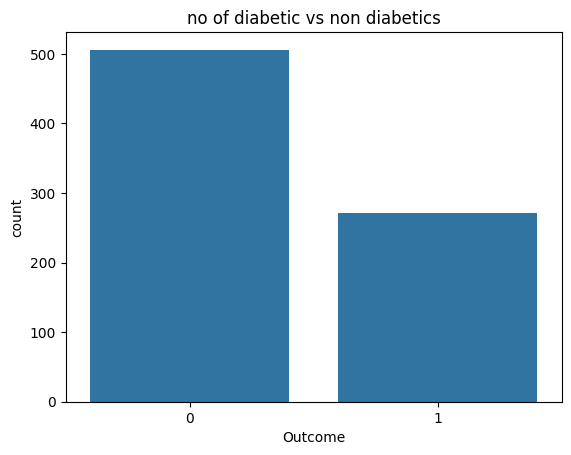

In [79]:
sns.countplot(x='Outcome',data=df)
plt.title('no of diabetic vs non diabetics') 

In [82]:
df6=df['Outcome'].value_counts()

Text(0.5, 1.0, 'diabetic vs non_diabetic patient')

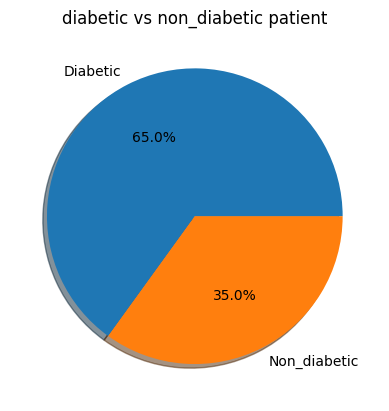

In [90]:
plt.pie(df6, labels=['Diabetic','Non_diabetic'], autopct='%1.1f%%',shadow=True)
plt.savefig('diabetic.jpg',pad_inches=0.8,bbox_inches='tight')
plt.title('diabetic vs non_diabetic patient')    # over 65% patient are diabetic

<Axes: xlabel='Age', ylabel='count'>

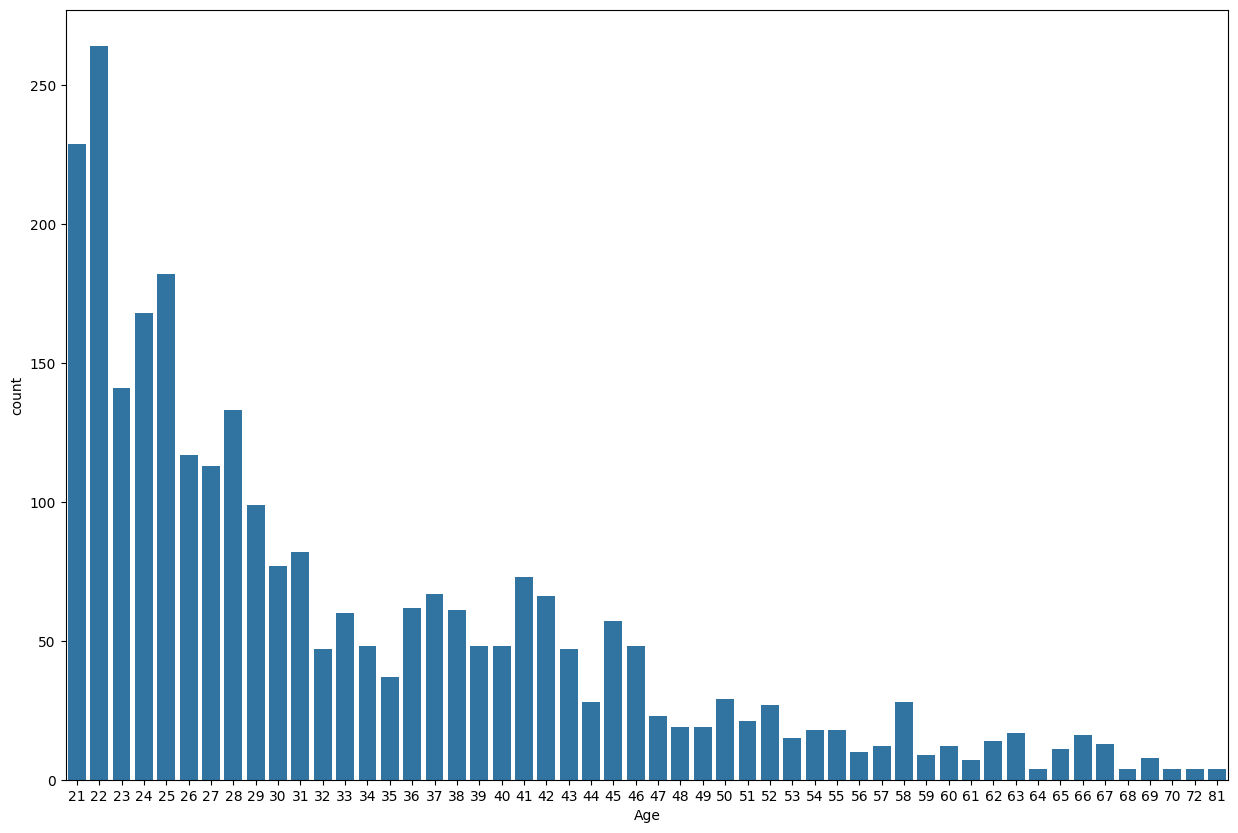

In [9]:
fig, ax=plt.subplots(figsize=(15,10))
sns.countplot(x='Age',data=df)

In [10]:
df['Age'].mean()

33.13222543352601

In [11]:
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [12]:
df2=df.drop(['Id','Pregnancies'],axis=1,inplace=True)

In [13]:
df.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [14]:
df.columns=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'Diabetes_degree', 'Age', 'Outcome']

In [15]:
df5=df.drop(['SkinThickness'],axis=1,inplace=True)

In [16]:
df.head(10)

,Glucose,BloodPressure,Insulin,BMI,Diabetes_degree,Age,Outcome
0,148,72,0,33.6,0.627,50,1
1,85,66,0,26.6,0.351,31,0
2,183,64,0,23.3,0.672,32,1
3,89,66,94,28.1,0.167,21,0
4,137,40,168,43.1,2.288,33,1
5,116,74,0,25.6,0.201,30,0
6,78,50,88,31.0,0.248,26,1
7,115,0,0,35.3,0.134,29,0
8,197,70,543,30.5,0.158,53,1
9,125,96,0,0.0,0.232,54,1


In [17]:
df.isnull().sum() # no missing values

Glucose            0
BloodPressure      0
Insulin            0
BMI                0
Diabetes_degree    0
Age                0
Outcome            0
dtype: int64

In [18]:
df.duplicated().sum()

1990

In [19]:
df7=df.drop_duplicates(inplace=True) #  duplicates handled

In [20]:
df.duplicated().sum()

0

In [21]:
df.head()

,Glucose,BloodPressure,Insulin,BMI,Diabetes_degree,Age,Outcome
0,148,72,0,33.6,0.627,50,1
1,85,66,0,26.6,0.351,31,0
2,183,64,0,23.3,0.672,32,1
3,89,66,94,28.1,0.167,21,0
4,137,40,168,43.1,2.288,33,1


<Axes: >

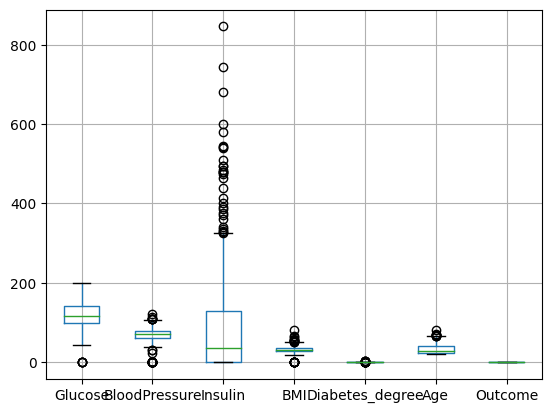

In [22]:
df.boxplot(column=['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'Diabetes_degree', 'Age','Outcome'])

## handling outlier

In [98]:
q1=df['Insulin'].quantile(0.25)
q3=df['Insulin'].quantile(0.75)
iqr=q3-q1
upperlimit=q3+(1.5*iqr)
lowerlimit=q1-(1.5*iqr)
upperlimit,lowerlimit

(325.0, -195.0)

In [100]:
out=df.loc[(df['Insulin']>upperlimit)|(df['Insulin']<lowerlimit)]

In [101]:
len(out)

30

In [103]:
df.loc[(df['Insulin']>upperlimit),'Insulin']=upperlimit
df.loc[(df['Insulin']<lowerlimit),'Insulin']=lowerlimit

<Axes: ylabel='Insulin'>

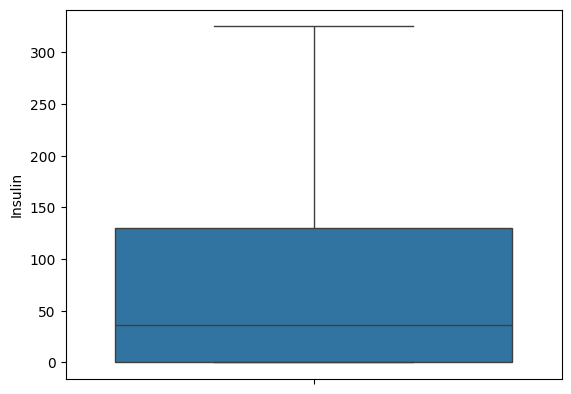

In [104]:
sns.boxplot(df['Insulin'])

In [105]:
q1=df['BMI'].quantile(0.25)
q3=df['BMI'].quantile(0.75)
iqr=q3-q1
upperlimit=q3+(1.5*iqr)
lowerlimit=q1-(1.5*iqr)
upperlimit,lowerlimit

(50.949999999999996, 13.15)

In [107]:
out_df=df.loc[(df['BMI']>upperlimit)|(df['BMI']<lowerlimit)]

In [108]:
len(out_df)

22

In [109]:
df.loc[(df['BMI']>upperlimit),'BMI']=upperlimit
df.loc[(df['BMI']<lowerlimit),'BMI']=lowerlimit

<Axes: ylabel='BMI'>

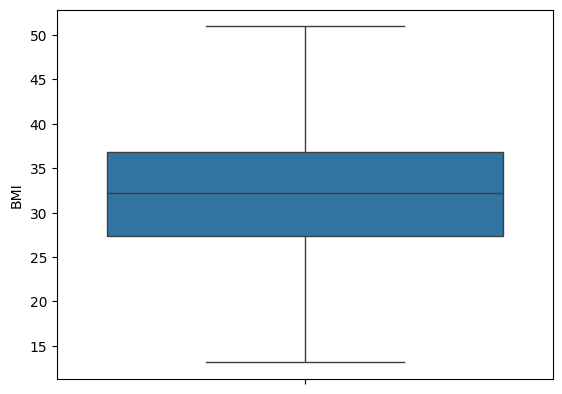

In [110]:
sns.boxplot(df['BMI'])

In [112]:
q1=df['BloodPressure'].quantile(0.25)
q3=df['BloodPressure'].quantile(0.75)
iqr=q3-q1
upperlimit=q3+(1.5*iqr)
lowerlimit=q1-(1.5*iqr)
upperlimit,lowerlimit

(107.0, 35.0)

In [115]:
bloo_df=df.loc[(df['BloodPressure']>upperlimit)|(df['BloodPressure']<lowerlimit)]


In [116]:
len(bloo_df)

0

In [117]:
df.loc[(df['BloodPressure']>upperlimit),'BloodPressure']=upperlimit
df.loc[(df['BloodPressure']<lowerlimit),'BloodPressure']=lowerlimit

<Axes: ylabel='BloodPressure'>

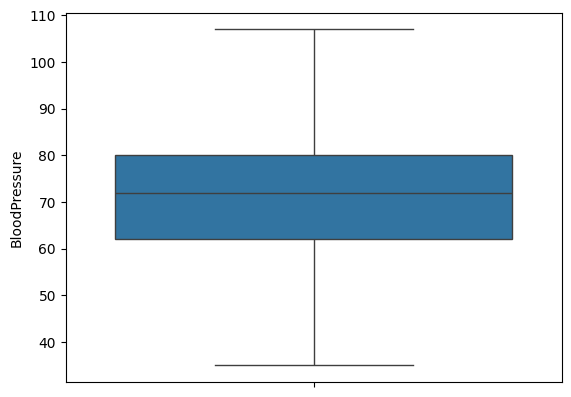

In [118]:
sns.boxplot(df['BloodPressure'])

In [119]:
q1=df['Age'].quantile(0.25)
q3=df['Age'].quantile(0.75)
iqr=q3-q1
upperlimit=q3+(1.5*iqr)
lowerlimit=q1-(1.5*iqr)
upperlimit,lowerlimit

(66.5, -1.5)

In [120]:
Age_df=df.loc[(df['BloodPressure']>upperlimit)|(df['BloodPressure']<lowerlimit)]

In [121]:
len(Age_df)

498

In [122]:
df.loc[(df['Age']>upperlimit),'Age']=upperlimit
df.loc[(df['Age']<lowerlimit),'Age']=lowerlimit

<Axes: ylabel='Age'>

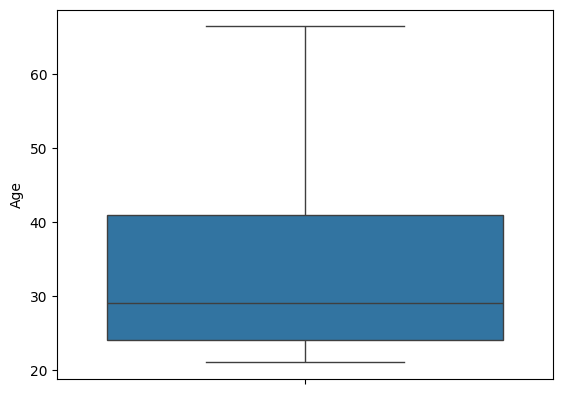

In [123]:
sns.boxplot(df['Age'])

# statistical analysis

In [133]:
df.describe()

,Glucose,BloodPressure,Insulin,BMI,Diabetes_degree,Age,Outcome
count,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000
mean,121.199229,70.579692,74.615681,32.259897,0.471861,33.306555,0.349614
std,31.990831,14.280945,94.543053,7.202884,0.330180,11.659594,0.477155
min,0.000000,35.000000,0.000000,13.150000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,27.325000,0.244000,24.000000,0.000000
50%,117.000000,72.000000,36.000000,32.250000,0.374500,29.000000,0.000000
75%,141.000000,80.000000,130.000000,36.775000,0.626750,41.000000,1.000000
max,199.000000,107.000000,325.000000,50.950000,2.420000,66.500000,1.000000


# correlation

In [134]:
df.corr()

,Glucose,BloodPressure,Insulin,BMI,Diabetes_degree,Age,Outcome
Glucose,1.000000,0.181315,0.318247,0.237895,0.137337,0.264498,0.459152
BloodPressure,0.181315,1.000000,0.044089,0.255752,0.031285,0.306607,0.122449
Insulin,0.318247,0.044089,1.000000,0.208445,0.191229,-0.058915,0.120865
BMI,0.237895,0.255752,0.208445,1.000000,0.135974,0.048321,0.291450
Diabetes_degree,0.137337,0.031285,0.191229,0.135974,1.000000,0.034873,0.172160
Age,0.264498,0.306607,-0.058915,0.048321,0.034873,1.000000,0.248594
Outcome,0.459152,0.122449,0.120865,0.291450,0.172160,0.248594,1.000000


In [24]:
df.columns

Index(['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'Diabetes_degree', 'Age',
       'Outcome'],
      dtype='object')

# Model building

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn .tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [27]:
x=df[['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'Diabetes_degree', 'Age']]
y=df['Outcome']

# Data splitting

In [156]:
from sklearn.model_selection import train_test_split

In [157]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [158]:
from sklearn .preprocessing import StandardScaler

In [159]:
x_train.shape, x_test.shape

((622, 6), (156, 6))

In [160]:
y_train.shape,y_test.shape

((622,), (156,))

# scaling the data

In [129]:
scaler=StandardScaler()

In [130]:
x_train=scaler. fit_transform(x_train)

In [131]:
x_test=scaler.transform(x_test)

In [36]:
y_train.shape,x_train.shape

((622,), (622, 6))

In [37]:
tree=DecisionTreeClassifier()
knn=KNeighborsClassifier(n_neighbors=5)
sv=SVC()
log=LogisticRegression()
rm=RandomForestClassifier()


In [38]:
knn.fit(x_train,y_train)
log.fit(x_train,y_train)

LogisticRegression()

In [39]:
tree.fit(x_train,y_train)
knn.fit(x_train,y_train)
sv.fit(x_train,y_train)
rm.fit(x_train,y_train)

RandomForestClassifier()

In [40]:
ypred1=tree.predict(x_test)
ypred2=knn.predict(x_test)
ypred3=sv.predict(x_test)
ypred4=rm.predict(x_test)
ypred5=log.predict(x_test)

# Model Evaluation

In [41]:
from sklearn import metrics

In [136]:
metrics.accuracy_score(ypred1,y_test) # decision tree

0.6923076923076923

In [137]:
metrics.accuracy_score(ypred2,y_test) # knn

0.7628205128205128

In [138]:
metrics.accuracy_score(ypred3,y_test) # svm

0.7948717948717948

In [139]:
metrics.accuracy_score(ypred4,y_test) # randomforest

0.7628205128205128

In [140]:
metrics.accuracy_score(ypred5,y_test) # losgistics regression

0.7564102564102564

In [141]:
tree.score(x_train,y_train)

1.0

In [142]:
knn.score(x_train,y_train)

0.8135048231511254

In [143]:
rm.score(x_train,y_train)

1.0

In [144]:
sv.score(x_train,y_train)

0.8247588424437299

In [145]:
log.score(x_train,y_train)

0.7781350482315113

In [52]:
treee=pd.DataFrame({'actual':y_test,
                    'predicted':ypred1})

In [146]:
treee

,actual,predicted
595,1,1
587,0,0
543,0,0
644,0,0
487,0,1
...,...,...
351,0,0
79,0,0
148,0,0
333,0,0


In [147]:
knnn=pd.DataFrame({'actual':y_test,
                    'predicted':ypred2})

In [148]:
knnn

,actual,predicted
595,1,1
587,0,0
543,0,0
644,0,0
487,0,1
...,...,...
351,0,0
79,0,0
148,0,0
333,0,0


In [56]:
svv=pd.DataFrame({'actual':y_test,
                    'predicted':ypred3})

In [57]:
svv

,actual,predicted
595,1,1
587,0,0
543,0,0
644,0,0
487,0,1
...,...,...
351,0,0
79,0,0
148,0,0
333,0,0


In [58]:
logg=pd.DataFrame({'actual':y_test,
                    'predicted':ypred5})

In [149]:
logg

,actual,predicted
595,1,1
587,0,0
543,0,0
644,0,0
487,0,1
...,...,...
351,0,0
79,0,0
148,0,1
333,0,0


In [60]:
from sklearn .metrics import confusion_matrix

In [61]:
sv_cf=confusion_matrix(ypred3,y_test)

<Axes: >

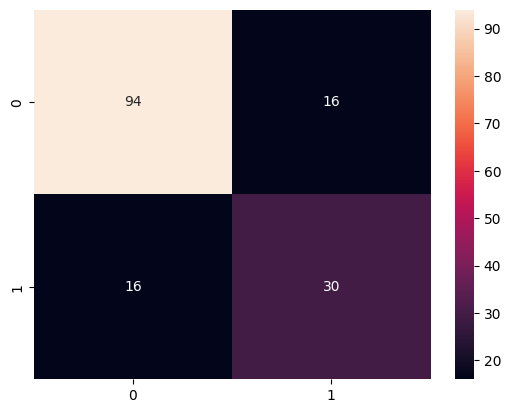

In [150]:
sns.heatmap(sv_cf,annot=True,color='green')

In [151]:
# 0 was predicted correctly 94 times and wrong 16 times
# 1 was predicted corrcetly 30 times and wrong 16 times

In [152]:
knn_cf=confusion_matrix(ypred2,y_test)

<Axes: >

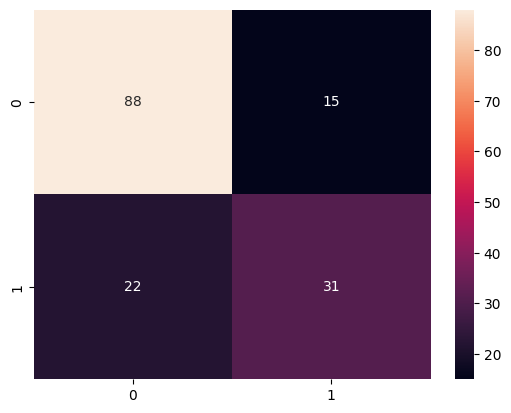

In [153]:
sns.heatmap(knn_cf,annot=True,)

In [66]:
# 0 correctly predicted 88 times amd 15 times wrong
# 1 correctly predicted 31 times and 22 times wrong

Text(0.5, 1.0, 'tree')

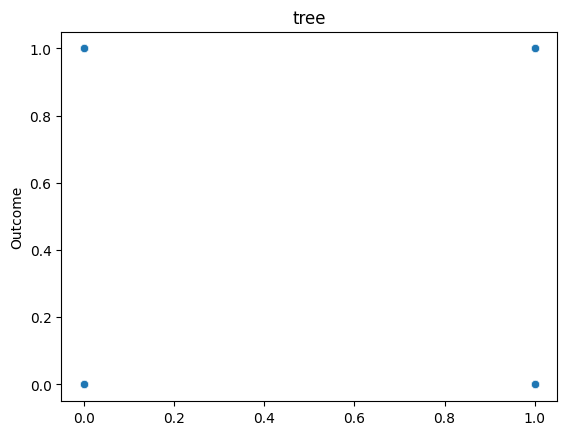

In [67]:
sns.scatterplot(x=ypred1,y=y_test)
plt.title('tree')

Text(0.5, 1.0, 'svc')

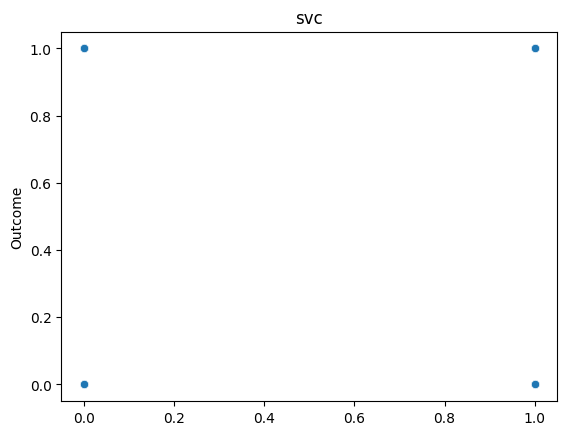

In [68]:
sns.scatterplot(x=ypred3,y=y_test)
plt.title('svc')

Text(0.5, 1.0, 'svc')

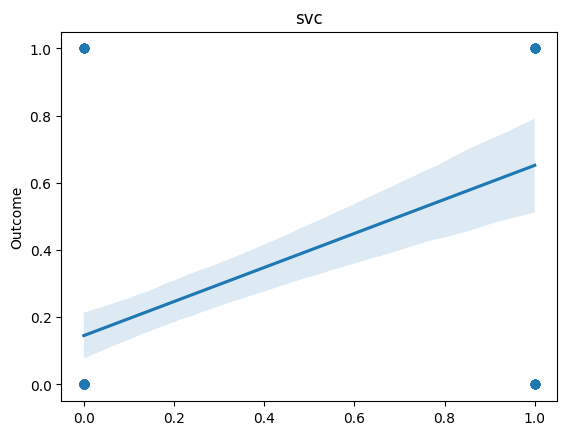

In [154]:
sns.regplot(x=ypred3,y=y_test)
plt.title('svc')

# svc model gave higher accuracy and is chosen

# Model testing

In [161]:
sv.predict(scaler.transform([[183,	64,	0	,23.3,	0.672	,32	]]))

C:\Users\USER\anaconda3\envs\tf_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [162]:
sv.predict(scaler.transform([[116,	74,	0,	25.6,	0.201,	30	]])) #corrcetly predicted

C:\Users\USER\anaconda3\envs\tf_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [163]:
sv.predict(scaler.transform([[137,	40	,168,	43.1,	2.288,	33	]]))  #corrcetly predicted

C:\Users\USER\anaconda3\envs\tf_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [77]:
# Conclusion:
## model fitted and predicted well
## there is 65% of diabetic patient , simply means diabeties is gradually increasing and people should watch out for their health.

# Recommendation:
## Patient should check their health requlary.
## they should also have personalized sugar checking device  in their home.
## no self treatment.
## Always talk to your doctor.
## Drink water regularly.